# Predict the Automobile Insurance claim

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import timedelta

In [2]:
# Importing the dataset
auto_df = pd.read_csv("C:\\Users\\PUNEET SINGH\\auto.csv")
# Shape of the dataset
print("Shape of the dataset {}".format(auto_df.shape))
print("##"*30)
print("Info of the data {}",auto_df.info())

Shape of the dataset (9134, 26)
############################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-nu

In [3]:
auto_df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,02-03-2011,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# Summary of the continous variables and categorical variables in the dataset
print("Continous variables \n{}".format(auto_df.describe()))
print("__"*40)
print("Categorical Variables \n{}".format(auto_df.describe(include='O')))

Continous variables 
       Claim Amount        Income  Monthly Premium Auto  \
count   9134.000000   9134.000000           9134.000000   
mean     800.494047  37657.380009             93.219291   
std      687.096761  30379.904734             34.407967   
min      189.800768      0.000000             61.000000   
25%      399.425179      0.000000             68.000000   
50%      578.018220  33889.500000             83.000000   
75%      896.216704  62320.000000            109.000000   
max     8332.538119  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.00

In [5]:
# From the data summary we can  remove the feature 'Customer' id and feature 'Country' as it contains data of US only.

In [6]:
auto_df['Effective To Date'] = pd.to_datetime(auto_df['Effective To Date'])
# Converted the Object type to Date Time

In [7]:
auto_df['Effective To Date'].max(),auto_df['Effective To Date'].min()

(Timestamp('2011-02-28 00:00:00'), Timestamp('2011-01-01 00:00:00'))

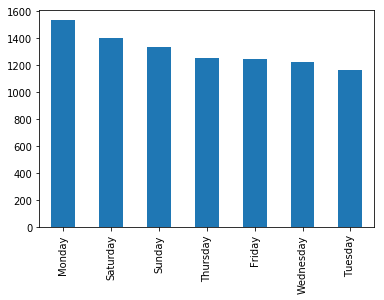

In [8]:
auto_df['Effective To Date'].dt.weekday_name.value_counts().plot.bar()
# Finding the day at which maximum claim has been taken

In [9]:
# Finding the missing values
auto_df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [10]:
corr_df = auto_df.corr()
corr_df
# Correlation of the continous variables

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


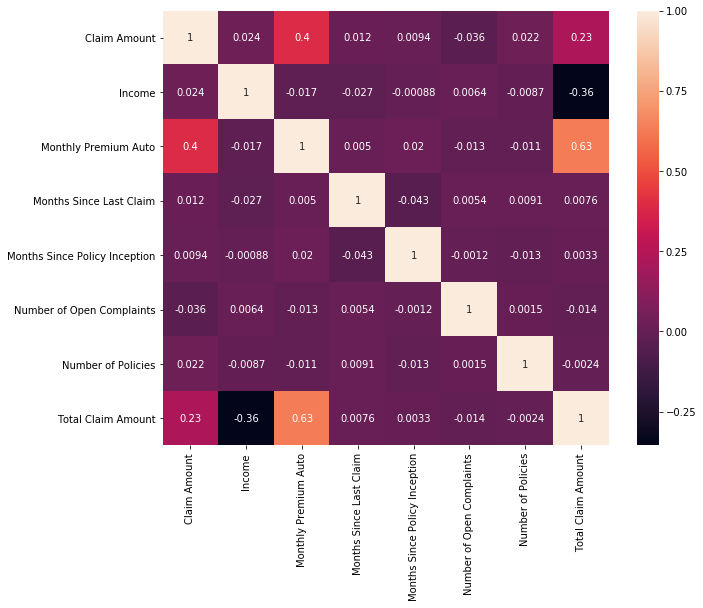

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_df,annot=True)

In [12]:
# From the correlation heatmap it is clear  that Feature 'Income' and Target variable are highly negatively corelated

In [13]:
auto_df.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [14]:
auto_df.rename(columns={'State Code':'State_Code','Claim Amount':'Claim_Amount','Effective To Date':'Date','Location Code':'Location_Code',
                       'Marital Status':'Marital',
                       'Monthly Premium Auto':'MonthlyPremium','Months Since Last Claim':'Months_Since_Last_Claim',
                       'Policy Type':'Policy_Type','Claim Reason':'Claim_Reason',
                       'Total Claim Amount':'Total_Claim_Amount','Vehicle Class':'Vehicle_Class'},inplace=True)

In [15]:
auto_df.dtypes

Customer                                 object
Country                                  object
State_Code                               object
State                                    object
Claim_Amount                            float64
Response                                 object
Coverage                                 object
Education                                object
Date                             datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location_Code                            object
Marital                                  object
MonthlyPremium                            int64
Months_Since_Last_Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy_Type                              object
Policy                                  

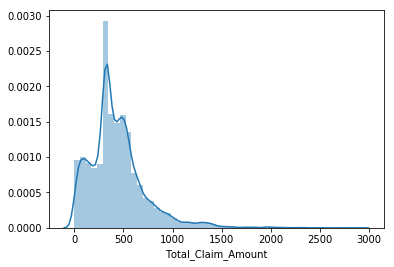

In [16]:
sns.distplot(auto_df['Total_Claim_Amount'])
# Checking for the Normality of the data

In [17]:
# Dropping the customer and country feature
auto_df.drop(['Customer','Country'],axis=1,inplace=True)

In [18]:
auto_df['Date'].max(),auto_df['Date'].min()

(Timestamp('2011-02-28 00:00:00'), Timestamp('2011-01-01 00:00:00'))

In [19]:
# From the date it is clear that this is data is of two months

In [20]:
# Converting the date feature into the datetime
auto_df["isWeekend"] = ((pd.to_datetime(auto_df["Date"], format = '%d/%m/%Y').dt.dayofweek) // 5 == 1).astype(int)
auto_df["weekday"] = pd.to_datetime(auto_df["Date"], format = '%d/%m/%Y').dt.day_name()
auto_df.drop(['Date'],axis=1,inplace=True)

In [21]:
auto_df.head()

,State_Code,State,Claim_Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,...,Number of Policies,Policy_Type,Policy,Claim_Reason,Sales Channel,Total_Claim_Amount,Vehicle_Class,Vehicle Size,isWeekend,weekday
0,KS,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,...,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,0,Thursday
1,NE,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,...,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize,0,Monday
2,OK,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,...,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize,1,Saturday
3,MO,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize,0,Thursday
4,KS,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,...,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize,0,Thursday


In [22]:
# Dividing the data into categorical and Numerical features
auto_df_categorical = auto_df.select_dtypes(exclude=['int64', 'float64'])
auto_df_numerical = auto_df.select_dtypes(include=['int64', 'float64'])

In [23]:
auto_df_categorical.head()

,State_Code,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital,Policy_Type,Policy,Claim_Reason,Sales Channel,Vehicle_Class,Vehicle Size,isWeekend,weekday
0,KS,Kansas,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Collision,Agent,Two-Door Car,Medsize,0,Thursday
1,NE,Nebraska,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Scratch/Dent,Agent,Four-Door Car,Medsize,0,Monday
2,OK,Oklahoma,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Collision,Agent,Two-Door Car,Medsize,1,Saturday
3,MO,Missouri,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Collision,Call Center,SUV,Medsize,0,Thursday
4,KS,Kansas,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Collision,Agent,Four-Door Car,Medsize,0,Thursday


In [24]:
# Checking the Unique values in the categorical data
auto_df_categorical.nunique()

State_Code          5
State               5
Response            2
Coverage            3
Education           5
EmploymentStatus    5
Gender              2
Location_Code       3
Marital             3
Policy_Type         3
Policy              9
Claim_Reason        4
Sales Channel       4
Vehicle_Class       6
Vehicle Size        3
isWeekend           2
weekday             7
dtype: int64

In [25]:
auto_df_numerical.head()

,Claim_Amount,Income,MonthlyPremium,Months_Since_Last_Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total_Claim_Amount
0,276.351928,56274,69,32,5,0,1,384.811147
1,697.953590,0,94,13,42,0,8,1131.464935
2,1288.743165,48767,108,18,38,0,2,566.472247
3,764.586183,0,106,18,65,0,7,529.881344
4,281.369258,43836,73,12,44,0,1,138.130879


In [26]:
# Value_count in Feature Income
auto_df_numerical['Income'].value_counts()

0        2317
95697      12
40864       7
24910       7
25965       7
27972       7
33190       7
25370       7
26876       7
20978       7
61108       7
35482       6
60021       6
18495       6
19683       6
46503       6
21604       6
19864       6
30817       6
10312       6
56342       6
44428       6
19614       6
51643       6
13663       6
22520       6
82664       6
31278       6
60475       6
57449       6
         ... 
29051       1
18820       1
33157       1
88454       1
83576       1
34759       1
37073       1
98701       1
96610       1
59744       1
63834       1
80210       1
71982       1
76389       1
35124       1
92472       1
41273       1
96200       1
28987       1
16701       1
20799       1
28995       1
51524       1
72006       1
69959       1
26952       1
84300       1
22862       1
20815       1
57240       1
Name: Income, Length: 5694, dtype: int64

In [27]:
# Transforming the Categorical data into binary form through Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
auto_df_categorical = auto_df_categorical.apply(LabelEncoder().fit_transform)

In [28]:
auto_df_categorical.head()

,State_Code,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital,Policy_Type,Policy,Claim_Reason,Sales Channel,Vehicle_Class,Vehicle Size,isWeekend,weekday
0,1,1,0,0,0,1,0,1,1,0,2,0,0,5,1,0,4
1,3,3,0,1,0,4,0,1,2,1,5,3,0,0,1,0,1
2,4,4,0,2,0,1,0,1,1,1,5,0,0,5,1,1,2
3,2,2,0,0,0,4,1,1,1,0,1,0,2,3,1,0,4
4,1,1,0,0,0,1,1,0,2,1,3,0,0,0,1,0,4


In [29]:
# Check the skew of all numerical features and removing it through BOX COX TRANSFORM
from scipy.stats import skew
# numerical data skewness
skewed_feats = auto_df_numerical.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


Skew in numerical features: 

There are 8 skewed numerical features to Box Cox transform


In [30]:
# Standardising the data 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
cols_train = list(auto_df_numerical.columns)
index_train = auto_df_numerical.index.tolist()

In [31]:
auto_df_numerical_numerical_names = auto_df_numerical.columns
auto_df_numerical_numerical_index = auto_df_numerical.index

In [32]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.5
for feat in skewed_features:
    #all_data[feat] += 1
    auto_df_numerical[feat] = boxcox1p(auto_df_numerical[feat], lam)

In [33]:
#Check values in numerical columns after minmax scaling
auto_df_numerical.head(5)

,Claim_Amount,Income,MonthlyPremium,Months_Since_Last_Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total_Claim_Amount
0,31.307773,472.447047,14.733201,9.489125,2.898979,0.0,0.828427,37.284152
1,50.875461,0.000000,17.493589,5.483315,11.114877,0.0,4.000000,65.304233
2,69.825989,439.669560,18.880613,6.717798,10.489996,0.0,1.464102,45.643352
3,53.338456,0.000000,18.688161,6.717798,14.248077,0.0,3.656854,44.081725
4,31.607693,416.745746,15.204651,5.211103,11.416408,0.0,0.828427,21.590751


In [34]:
#Merge categorical and numerical columns back into respective X 
final_df = pd.concat([auto_df_categorical, auto_df_numerical], axis=1)
final_df = pd.DataFrame(final_df)
final_df.head()

,State_Code,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital,Policy_Type,...,isWeekend,weekday,Claim_Amount,Income,MonthlyPremium,Months_Since_Last_Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total_Claim_Amount
0,1,1,0,0,0,1,0,1,1,0,...,0,4,31.307773,472.447047,14.733201,9.489125,2.898979,0.0,0.828427,37.284152
1,3,3,0,1,0,4,0,1,2,1,...,0,1,50.875461,0.000000,17.493589,5.483315,11.114877,0.0,4.000000,65.304233
2,4,4,0,2,0,1,0,1,1,1,...,1,2,69.825989,439.669560,18.880613,6.717798,10.489996,0.0,1.464102,45.643352
3,2,2,0,0,0,4,1,1,1,0,...,0,4,53.338456,0.000000,18.688161,6.717798,14.248077,0.0,3.656854,44.081725
4,1,1,0,0,0,1,1,0,2,1,...,0,4,31.607693,416.745746,15.204651,5.211103,11.416408,0.0,0.828427,21.590751


In [35]:
X = final_df.drop("Total_Claim_Amount",axis=1)
y = final_df['Total_Claim_Amount']

In [36]:
print(X.shape, auto_df_numerical.shape, auto_df_categorical.shape)

(9134, 24) (9134, 8) (9134, 17)


In [37]:
# Splitting the data and a function for metrics measure
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_log_error
# We have created a function to print accuracy metrics which can be used
# to get accuracy metrics of all models in upcoming steps
def print_accuracy_report(y_test, y_pred,X_test, model):
 print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred)*100)   
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [49]:
#similarly define a function for random forest regressor
from sklearn.ensemble import RandomForestRegressor
def RandomForestRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
randomForestModel = RandomForestRegressorModel(X,y)

R Squared(Accuracy) 84.72302856985975
Mean Absolute Error: 3.8362195159082377
Mean Squared Error: 28.473983113349163
Root Mean Squared Error: 5.336101864971204
Root Mean Squared Log Error 0.24783332510029601
None


In [39]:
# RANDOM FOREST HAS PREDITED THE ACCURACY WHICH IS 84.72 % WHICH IS GOOD!

In [40]:
# we have created a function to generate linear regression model
# which can then be called again after feature selection or other steps
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
def LinearRegressionModel(X,y):
 X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
 regressor = LinearRegression()  
 regressor.fit(X_train, y_train)
 y_pred = regressor.predict(X_test)
 print(print_accuracy_report(y_test, y_pred, X_test, regressor))
 return regressor
linearModel = LinearRegressionModel(X,y)

R Squared(Accuracy) 59.7096443234657
Mean Absolute Error: 6.824906048235195
Mean Squared Error: 75.09517919900549
Root Mean Squared Error: 8.665747469145723
Root Mean Squared Log Error 0.34423388041071135
None


In [41]:
# Random Forest has predicted better accuracy than Linear Regression model

In [42]:
# Applying the Extra regressor 
# select features using extratreesclassifier
from sklearn.ensemble import ExtraTreesRegressor
def ExtraTreesRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = ExtraTreesRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
extraTreeRegressorModel = ExtraTreesRegressorModel(X,y)

R Squared(Accuracy) 83.89798344748837
Mean Absolute Error: 3.835551480142468
Mean Squared Error: 30.01174345999781
Root Mean Squared Error: 5.478297496485364
Root Mean Squared Log Error 0.2534875802407032
None


In [43]:
# AMONG ALL THE MODELS RANDOM FOREST HAS PREDICTED THE BEST !!

In [47]:
# Applying the Hyperparameter Tuning on the Random Forest Model
# Importing the GridSeachCV
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)

In [59]:
params = ({'n_estimators':[20,30,40],'criterion':['mse','mae'],'max_depth':[3,4,5]})

In [60]:
grid_search = GridSearchCV(estimator=randomForestModel,param_grid=params,n_jobs=-1)

In [61]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [20, 30, 40], 'criterion': ['mse', 'mae'], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
grid_search.predict(X_test)

array([19.46745877, 37.35866904, 41.65579269, ..., 47.6533089 ,
       16.28122339, 41.3194514 ])

In [63]:
print("Best score of the model :",grid_search.best_score_)
print("Best parameter of the model :",grid_search.best_params_)

Best score of the model : 0.8386878167457807
Best parameter of the model : {'criterion': 'mse', 'max_depth': 5, 'n_estimators': 40}


After applying the HyperParameters we have got the best score and best parameters. Score of the Random Forest is 84.72%

In [64]:
# Saving the Random Forest Model as it has predicted the best 
# Importing Pickle
import pickle
filehandler = open("Project_31.obj","wb")
# saving the model in pickel string
saved_rf_model = pickle.dump(randomForestModel,filehandler)
filehandler.close()